In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
import os

In [2]:
df = pd.read_csv('Survey-1.csv')

In [3]:
df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [4]:
df.shape

(62, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [6]:
df.set_index('ID' ,inplace = True)
df.head()

,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
ID,,,,,,,,,,,,,
1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [7]:
df.isna().sum()

Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [8]:
df.describe()

,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [37]:
pd.crosstab(df['Gender'],df['Major'], margins = True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [10]:
pd.crosstab(df['Gender'],df['Grad Intention'], margins = False)

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [11]:
pd.crosstab(df['Gender'],df['Employment'], margins = False)

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [12]:
pd.crosstab(df['Gender'],df['Computer'], margins = False)

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [13]:
(df.Gender.value_counts().Male/df.Gender.value_counts().sum()).round(decimals = 2)

0.47

In [14]:
(df.Gender.value_counts().Female/df.Gender.value_counts().sum()).round(decimals = 2)

0.53

In [15]:
list_major = df['Major'].unique()
list_major

array(['Other', 'Management', 'CIS', 'Economics/Finance', 'Undecided',
       'International Business', 'Retailing/Marketing', 'Accounting'],
      dtype=object)

In [16]:
male_df = df[df['Gender'] == 'Male']

In [17]:
round(male_df.Major.value_counts()/len(male_df) , 2)

Management                0.21
Retailing/Marketing       0.17
Other                     0.14
Accounting                0.14
Economics/Finance         0.14
Undecided                 0.10
International Business    0.07
CIS                       0.03
Name: Major, dtype: float64

In [18]:
female_df = df[df['Gender'] == 'Female']

In [39]:
round(female_df.Major.value_counts()/len(female_df) , 2)

Retailing/Marketing       0.27
Economics/Finance         0.21
Management                0.12
International Business    0.12
CIS                       0.09
Other                     0.09
Accounting                0.09
Name: Major, dtype: float64

In [46]:
prob_of_male = len(df[df['Gender'] == 'Male'])/len(df)
prob_of_male

0.46774193548387094

In [45]:
prob_of_grad_after_male = len(df[(df['Gender'] == 'Male') & (df['Grad Intention'] == 'Yes')]) / len(df[df['Gender'] == 'Male'])
prob_of_grad_after_male

0.5862068965517241

In [48]:
round(prob_of_male * prob_of_grad_after_male , 2)

0.27

In [23]:
prob_of_female = round(len(df[df['Gender'] == 'Female'])/len(df),2)
prob_of_female

0.53

In [24]:
prob_of_nolaptop = round((len(df[df['Gender'] == 'Female']) - len(df[(df['Gender'] == 'Female') & (df['Computer'] == 'Laptop')])) / (len(df[df['Gender'] == 'Female'])) , 2 )

In [25]:
prob_no_laptop_after_female = round(prob_of_nolaptop*prob_of_female , 2)
prob_no_laptop_after_female

0.06

In [26]:
pd.crosstab(df['Gender'],df['Employment'], margins = True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [27]:
ans_251 = round((29/62) + (10/62) - (7/62) , 2)
ans_251

0.52

In [28]:
pd.crosstab(df['Gender'],df['Major'], margins = True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [49]:
ans_252 = round((8/33) ,2)
ans_252

0.24

In [50]:
pd.crosstab(df['Gender'],df['Grad Intention'].where(df['Grad Intention'] != "Undecided"), margins = False)

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [31]:
round(len(df[df['GPA'] < 3]) / len(df) , 2)

0.27

In [32]:
pd.crosstab(df['Gender'],df['Salary'], margins = True) 

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0,All
Gender,,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1,33
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1,29
All,1,5,2,1,1,12,1,5,1,1,9,1,1,8,8,1,1,1,2,62


In [33]:
pd.crosstab(df['Gender'],df['Salary'].where(df['Salary'] >= 50), margins = True) 

Salary,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0,All
Gender,,,,,,,,,,
Female,5,0,0,5,5,0,1,1,1,18
Male,4,1,1,3,3,1,0,0,1,14
All,9,1,1,8,8,1,1,1,2,32


In [51]:
male_261 = round((14/29) , 2)
female_262 = round((18/33) , 2)
print(male_261)
print(female_262)

0.48
0.55


In [35]:
df[['Salary','GPA','Spending',"Text Messages"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,62.0,48.548387,12.080912,25.0,40.0,50.00,55.0,80.0
GPA,62.0,3.129032,0.377388,2.3,2.9,3.15,3.4,3.9
Spending,62.0,482.016129,221.953805,100.0,312.5,500.00,600.0,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.0,200.00,300.0,900.0


<function matplotlib.pyplot.show(close=None, block=None)>

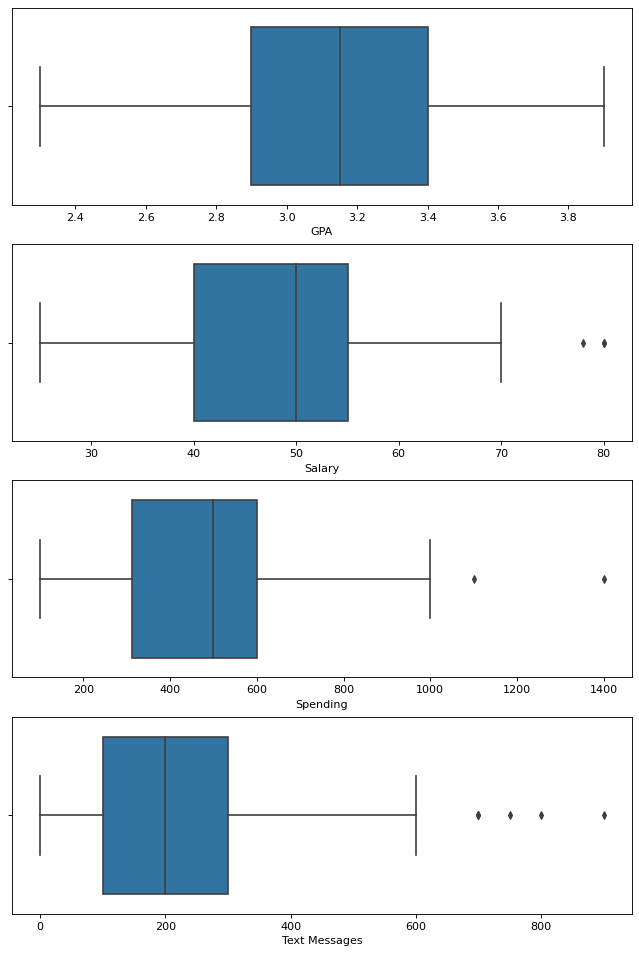

In [36]:
plt.figure(figsize = (10,15) , dpi = 80)
plt.subplot(4,1,1)
sns.boxplot(x = df['GPA'])
plt.subplot(4,1,2)
sns.boxplot(x = df['Salary'])
plt.subplot(4,1,3)
sns.boxplot(x = df['Spending'])
plt.subplot(4,1,4)
sns.boxplot(x = df['Text Messages'])
plt.show